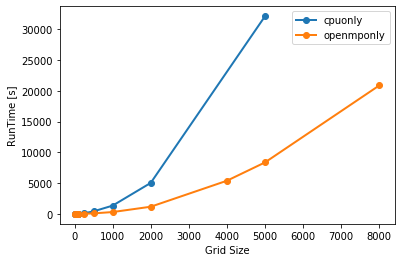

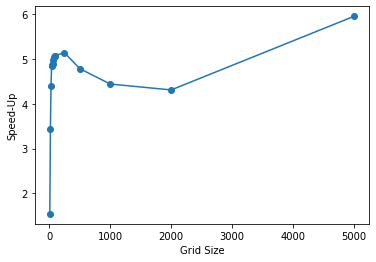

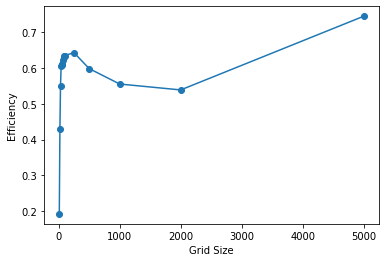

In [4]:
import os

import matplotlib.pyplot as plt

directory = '.'
openmpDict = dict()
cpuDict = dict()

for root, dirs, files in os.walk(directory):
    for file in files:
        if '.txt' in file:
            subline = 'Profiling: Total CPU'
            pth = file
            with open(pth) as f:
                for line in f:
                    line = line.rstrip()
                    if subline in line:
                        if 'openmp' in file:
                            n = int(pth[pth.find('_') + 2:pth.find('.')])
                            time = float(line.split()[5])
                            #print(pth, int(pth[pth.find('_') + 2:pth.find('.')]), float(line.split()[5]))
                            openmpDict.update({n: time})
                        if 'cpu' in file:
                            n = int(pth[pth.find('_') + 2:pth.find('.')])
                            time = float(line.split()[5])
                            #print(pth, int(pth[pth.find('_') + 2:pth.find('.')]), float(line.split()[5]))
                            cpuDict.update({n: time})

cpuKeyList = list()
cpuValList = list()

for key in sorted(cpuDict):
    #print("%s: %s" % (key, cpuDict[key]))
    cpuKeyList.append(int(key))
    cpuValList.append(cpuDict[key])
                        

openmpKeyList = list()
openmpValList = list()

for key in sorted(openmpDict):
    #print("%s: %s" % (key, openmpDict[key]))
    openmpKeyList.append(int(key))
    openmpValList.append(openmpDict[key])

    
plt.figure(1)

plt.plot(cpuKeyList, cpuValList, 'o-', label='cpuonly', linewidth=2)
plt.plot(openmpKeyList, openmpValList, 'o-', label='openmponly', linewidth=2)

plt.xlabel('Grid Size')
plt.ylabel('RunTime [s]')
plt.legend()
#plt.xlim([0, 1000])

plt.figure(2)

if len(cpuKeyList) < len(openmpKeyList):
    count = len(cpuKeyList)
    keyList = cpuKeyList
else:
    count = len(openmpKeyList)
    keyList = openmpKeyList


Speedup = list()
Efficiency = list()
for item in range(0, count):
    Speedup.append(cpuValList[item] / openmpValList[item])
    Efficiency.append(cpuValList[item] / openmpValList[item] / 8)
    
plt.figure(2)
plt.plot(keyList, Speedup, '-o')
plt.xlabel('Grid Size')
plt.ylabel('Speed-Up')
plt.show()

plt.figure(3)
plt.plot(keyList, Efficiency, '-o')
plt.xlabel('Grid Size')
plt.ylabel('Efficiency')
plt.show()